# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

***
***
#### 1. Load agent and set up environment
Following a structure similar to the one 
[here](https://github.com/raplima/udacity_drln-p1_navigation/blob/master/Navigation.ipynb) 
(which by itself followed one of the provided examples), the agent class is defined in [ddpg_agent.py](./ddpg_agent.py) script. 
The agent class uses the Actor and Critic networks defined in [model.py](./model.py).  
Both [ddpg_agent.py](./ddpg_agent.py) and [model.py](./model.py) are slighlty modified from [Udacity Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) content.

In [6]:
# import the necessary libraries
from collections import deque
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
from ddpg import MADDPG
# how does it perform without training? 
agent = MADDPG( num_agents, state_size, action_size)

for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.act(states)                         # select an action (for each agent)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (max over agents) this episode: {:.3f}'.format(np.max(scores)))

Total score (max over agents) this episode: 0.000
Total score (max over agents) this episode: 0.000
Total score (max over agents) this episode: 0.000
Total score (max over agents) this episode: 0.000
Total score (max over agents) this episode: 0.000


#### 2. Train the agent
Train the agent and plot the results

In [8]:
def train(agent, env, n_episodes=3000, success_score=0.5):
    """Train DDPG agent
    
    Params
    ======
        agent : agent object
        env: unity environment
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
        success_score: agent must get an average score of success_score over 100 consecutive episodes to consider solved
    """
    scores_list = []                                               # list containing scores from each episode
    scores_avg  = []
    scores_window = deque([0.0 for _ in range(100)], maxlen=100)   # last 100 scores
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)

        while True:          
            actions = agent.act(states)       # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            
            agent.step(states, actions, rewards, next_states, dones) # agents step (train) 
            #agent.step(states, actions, np.reshape(np.array(rewards), (-1,1)), next_states, np.reshape(np.array(rewards), (-1,1)))

            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step

            if np.any(dones):                                  # exit loop if episode finished
                break
        
        # add up the rewards that each agent received (without discounting), 
        # to get a score for each agent. 
        # This yields 2 (potentially different) scores. We then take the maximum of these 2 scores.
        episode_reward = np.max(np.sum(np.array(rewards),axis=0))
        
        scores_window.append(np.max(scores))       # save most recent score
        scores_list.append(np.max(scores))              # save most recent score
        scores_avg.append(np.mean(scores_window))  # save average score over last 100 
        
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.3f} ({:.3f}:{:.3f})'.format(i_episode, 
                                                                          np.mean(scores_window), 
                                                                          np.max(scores), 
                                                                          scores[0],
                                                                          scores[1]), end="")

        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=success_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            agent.save_agents()
            break
        
    return scores_list, scores_avg

In [9]:
%%time
agent = MADDPG( num_agents, state_size, action_size)
scores, scores_avg = train(agent, env)

Episode 100	Average Score: 0.01	Score: 0.000 (-0.010:0.000)
Episode 200	Average Score: 0.03	Score: 0.000 (-0.010:0.000)
Episode 300	Average Score: 0.03	Score: 0.000 (0.000:-0.010)
Episode 400	Average Score: 0.04	Score: 0.000 (-0.010:0.000)
Episode 500	Average Score: 0.06	Score: 0.100 (0.090:0.100))
Episode 600	Average Score: 0.08	Score: 0.100 (0.100:0.090))
Episode 700	Average Score: 0.09	Score: 0.100 (-0.010:0.100)
Episode 800	Average Score: 0.09	Score: 0.000 (0.000:-0.010)
Episode 900	Average Score: 0.11	Score: 0.100 (-0.010:0.100)
Episode 1000	Average Score: 0.13	Score: 0.000 (0.000:-0.010)
Episode 1100	Average Score: 0.14	Score: 0.100 (0.090:0.100))
Episode 1200	Average Score: 0.16	Score: 0.000 (0.000:-0.010)
Episode 1300	Average Score: 0.20	Score: 0.100 (0.090:0.100))
Episode 1400	Average Score: 0.31	Score: 0.200 (0.200:0.090))
Episode 1500	Average Score: 0.29	Score: 0.800 (0.800:0.790))
Episode 1600	Average Score: 0.46	Score: 0.100 (0.100:0.090))
Episode 1622	Average Score: 0.51	

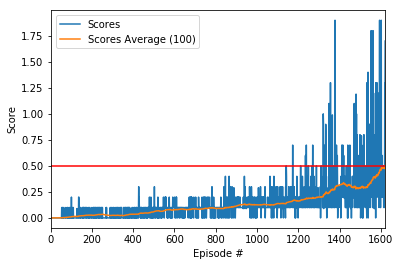

In [10]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(len(scores)), scores, label='Scores')
ax.plot(np.arange(len(scores)), scores_avg, label='Scores Average (100)')
ax.axhline(y=0.5, color='r')
ax.set_ylabel('Score')
ax.set_xlabel('Episode #')
ax.set_xlim([0, len(scores)])
ax.legend(fontsize='medium')
plt.savefig('training.pdf')
plt.show()

#### 3. Evaluate the trained agent
Load the saved weights and see a trained agent in action

In [13]:
# create new agent
agent = MADDPG( num_agents, state_size, action_size)
# load the saved weights
agent.load_agents()

for _ in range(3):
    # reset environment
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment, training is False    
    state = env_info.vector_observations                   # get the current state
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:    
        action = agent.act(state)                           # send the action to the environment
        env_info = env.step(action)[brain_name]             # send all actions to environment
        next_state = env_info.vector_observations           # get the next state
        rewards = env_info.rewards                          # get the reward
        dones = env_info.local_done                         # see if episode has finished

        state = next_state                                  # update state
        scores += rewards                                   # update reward

        if np.any(dones):                                   # exit loop if episode finished
            break
    print('Score: {:.3f} ({:.3f}:{:.3f})'.format(np.max(scores), scores[0], scores[1]))

Score: 0.100 (0.100:0.090)
Score: 1.000 (1.000:0.990)
Score: 0.290 (0.100:0.290)


When finished, you can close the environment.

In [14]:
env.close()